In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
melbourne = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

In [4]:
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
melbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
null_cols = [columns for columns in melbourne.columns if melbourne[columns].isnull().sum() > 0]

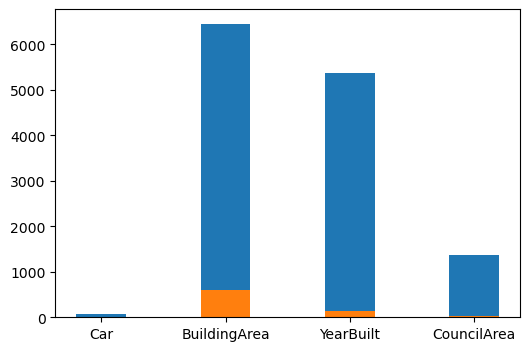

In [9]:
# Visualizing total null values w.r.t. unique values in columns
plt.figure(figsize=(6,4))
plt.bar(null_cols,melbourne[null_cols].isnull().sum(),0.4,label='null')
plt.bar(null_cols,melbourne[null_cols].nunique(),0.4,label='unique')
plt.show()

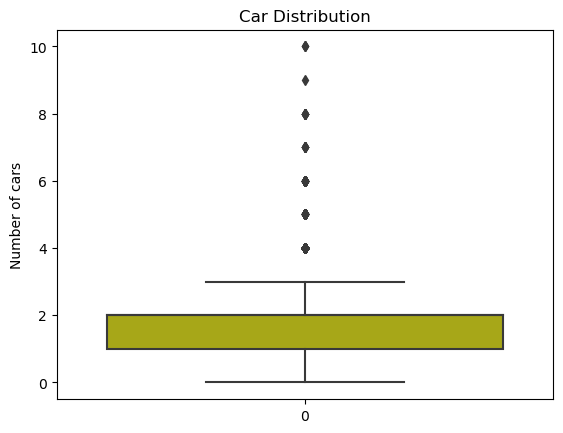

In [34]:
sns.boxplot(melbourne['Car'],color='y')
plt.title('Car Distribution')
plt.ylabel('Number of cars')
plt.show()

In [10]:
melbourne.Rooms.value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

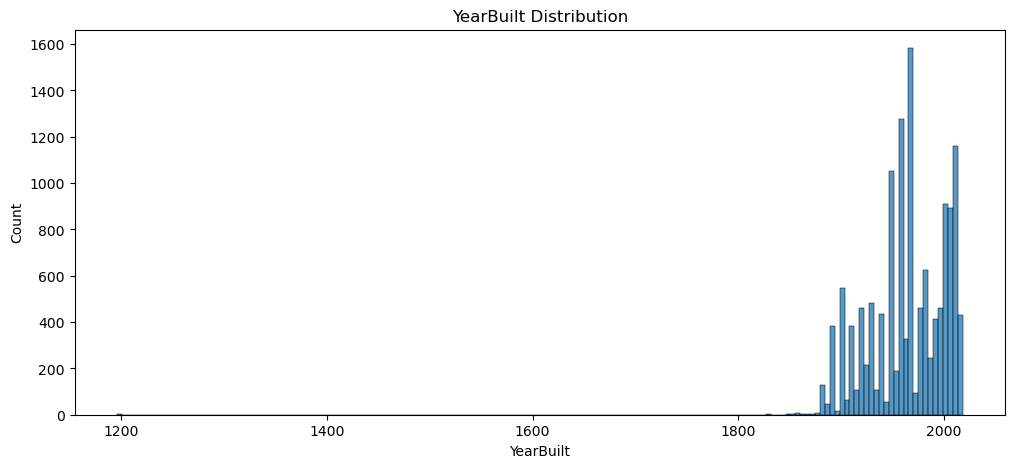

In [42]:
plt.figure(figsize=(12,5))
sns.histplot(melbourne['YearBuilt'])
plt.title('YearBuilt Distribution')
plt.show()

In [11]:
melbourne.YearBuilt.value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [12]:
melbourne.shape[0]

13580

In [13]:
melbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [14]:
melbourne.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [15]:
melbourne[null_cols].nunique()

Car              11
BuildingArea    602
YearBuilt       144
CouncilArea      33
dtype: int64

In [16]:
melbourne['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [17]:
melbourne[null_cols].dtypes

Car             float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
dtype: object

In [18]:
#using pandas of column imputation of car column
mean_value_Car = melbourne['Car'].mean()
melbourne['Car'].fillna(mean_value_Car,inplace=True)

In [19]:
#imputation of bulding area
mean_BuildingArea=melbourne['BuildingArea'].mean()
melbourne['BuildingArea'].fillna(mean_BuildingArea,inplace=True)

In [20]:
#imputation of year build and council area
melbourne['YearBuilt'].fillna(method='backfill',inplace=True)

In [21]:
#Droping column CouncilArea
melbourne.drop('CouncilArea',axis=1,inplace=True)

In [22]:
melbourne.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
#identifying categorical columns and numerical columns
categorical_cols = [cols for cols in melbourne.columns if melbourne[cols].nunique()<10 and melbourne[cols].dtype=='object']
numerical_cols = [cols for cols in melbourne.columns if melbourne[cols].dtype!='object' and cols!='Price']
my_cols = categorical_cols+numerical_cols

In [24]:
#Print my_cols
my_cols

['Type',
 'Method',
 'Regionname',
 'Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [25]:
# take Price to predict as y and rest data set value as X
y = melbourne.Price
X = melbourne[my_cols]
X.head()


,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1900.0,-37.7996,144.9984,4019.0
1,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.8079,144.9934,4019.0
2,h,SP,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.8093,144.9944,4019.0
3,h,PI,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,2014.0,-37.7969,144.9969,4019.0
4,h,VB,Northern Metropolitan,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.8072,144.9941,4019.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,test_size = 0.2,random_state =0)

In [50]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
OH_cols_train.index = X_train[categorical_cols].index
X_num_train = X_train.drop(categorical_cols,axis=1)
oh_X_train = pd.concat([X_num_train,OH_cols_train],axis=1)
oh_X_train.columns = oh_X_train.columns.astype(str)
oh_X_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,6,7,8,9,10,11,12,13,14,15
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,151.96765,1940.0,-37.85984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,151.96765,1970.0,-37.85800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,151.96765,1960.0,-37.79880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,151.96765,1995.0,-37.70830,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.00000,1970.0,-37.76230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
oh_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[categorical_cols]))
oh_cols_valid.index = X_valid[categorical_cols].index
X_num_valid = X_valid.drop(categorical_cols,axis=1)
oh_X_valid = pd.concat([X_num_valid,oh_cols_valid],axis=1)
oh_X_valid.head()
oh_X_valid.columns = oh_X_valid.columns.astype(str)

In [45]:
#importing Random Forest models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [55]:
#Training model and predicting house prices
model = RandomForestRegressor(n_estimators=400,random_state=0)
model.fit(oh_X_train,y_train)
predictions = model.predict(oh_X_valid)


In [57]:
# calculating error in values predictated
mae = mean_absolute_error(y_valid,predictions)
mae

159985.0265417117

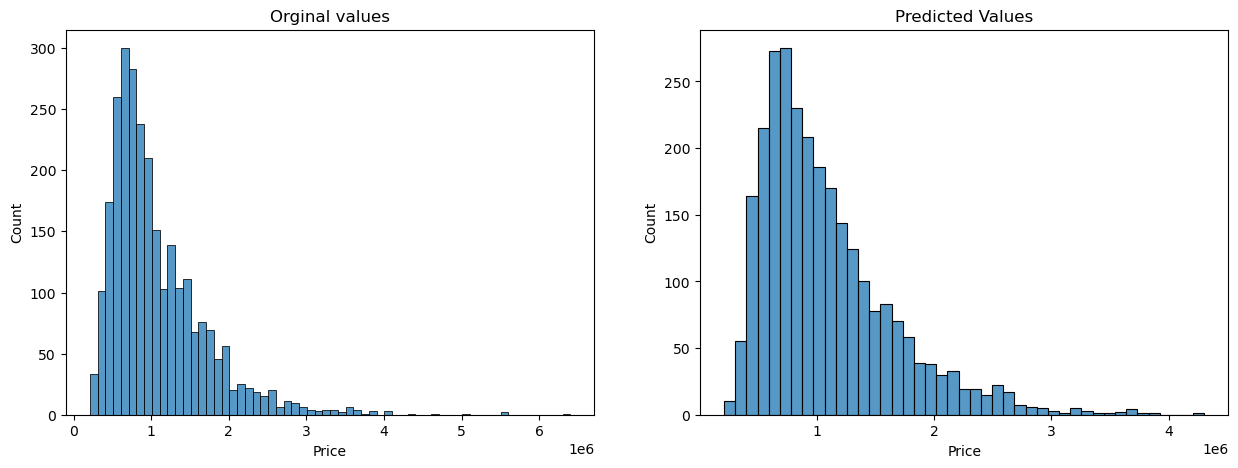

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(y_valid)
plt.title('Orginal values')
plt.subplot(1,2,2)
sns.histplot(predictions)
plt.title('Predicted Values')
plt.xlabel('Price')
plt.show()